In [10]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
# Loading the dataset

mnist = tf.keras.datasets.mnist

In [3]:
# Dividing the data to train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# Building the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [7]:
# Compile the model

model.compile(optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy',
                     metrics = ['accuracy'])

In [8]:
# Traning the model

r = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2969 - accuracy: 0.9126 - val_loss: 0.1432 - val_accuracy: 0.9546
Epoch 2/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1456 - accuracy: 0.9566 - val_loss: 0.1100 - val_accuracy: 0.9674
Epoch 3/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1076 - accuracy: 0.9676 - val_loss: 0.0810 - val_accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0786 - val_accuracy: 0.9764
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0764 - accuracy: 0.9761 - val_loss: 0.0734 - val_accuracy: 0.9777
Epoch 6/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0663 - accuracy: 0.9793 - val_loss: 0.0801 - val_accuracy: 0.9771
Epoch 7/10
60000/60000 [=======================

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [48]:
# Getting the predicted outputs
p_test = model.predict(X_test).argmax(axis=1)

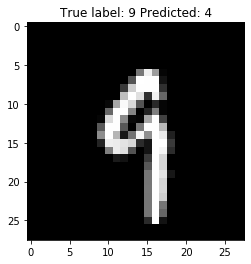

In [47]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (Y_test[i], p_test[i]));